In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
df = pd.read_csv("/home/ishaan/Codes/Presentations/Projects/facial-keypoints-detection/training.csv")

In [4]:
df.head(6)

,left_eye_center_x,left_eye_center_y,right_eye_center_x,right_eye_center_y,left_eye_inner_corner_x,left_eye_inner_corner_y,left_eye_outer_corner_x,left_eye_outer_corner_y,right_eye_inner_corner_x,right_eye_inner_corner_y,...,nose_tip_y,mouth_left_corner_x,mouth_left_corner_y,mouth_right_corner_x,mouth_right_corner_y,mouth_center_top_lip_x,mouth_center_top_lip_y,mouth_center_bottom_lip_x,mouth_center_bottom_lip_y,Image
0,66.033564,39.002274,30.227008,36.421678,59.582075,39.647423,73.130346,39.969997,36.356571,37.389402,...,57.066803,61.195308,79.970165,28.614496,77.388992,43.312602,72.935459,43.130707,84.485774,238 236 237 238 240 240 239 241 241 243 240 23...
1,64.332936,34.970077,29.949277,33.448715,58.856170,35.274349,70.722723,36.187166,36.034723,34.361532,...,55.660936,56.421447,76.352000,35.122383,76.047660,46.684596,70.266553,45.467915,85.480170,219 215 204 196 204 211 212 200 180 168 178 19...
2,65.057053,34.909642,30.903789,34.909642,59.412000,36.320968,70.984421,36.320968,37.678105,36.320968,...,53.538947,60.822947,73.014316,33.726316,72.732000,47.274947,70.191789,47.274947,78.659368,144 142 159 180 188 188 184 180 167 132 84 59 ...
3,65.225739,37.261774,32.023096,37.261774,60.003339,39.127179,72.314713,38.380967,37.618643,38.754115,...,54.166539,65.598887,72.703722,37.245496,74.195478,50.303165,70.091687,51.561183,78.268383,193 192 193 194 194 194 193 192 168 111 50 12 ...
4,66.725301,39.621261,32.244810,38.042032,58.565890,39.621261,72.515926,39.884466,36.982380,39.094852,...,64.889521,60.671411,77.523239,31.191755,76.997301,44.962748,73.707387,44.227141,86.871166,147 148 160 196 215 214 216 217 219 220 206 18...
5,69.680748,39.968748,29.183551,37.563364,62.864299,40.169271,76.898243,41.171888,36.401047,39.367626,...,58.800000,64.869084,82.471178,31.990430,81.669084,49.308112,78.487626,49.432374,93.898766,167 169 170 167 156 145 106 68 52 24 20 15 21 ...


In [5]:
df.keys()

Index(['left_eye_center_x', 'left_eye_center_y', 'right_eye_center_x',
       'right_eye_center_y', 'left_eye_inner_corner_x',
       'left_eye_inner_corner_y', 'left_eye_outer_corner_x',
       'left_eye_outer_corner_y', 'right_eye_inner_corner_x',
       'right_eye_inner_corner_y', 'right_eye_outer_corner_x',
       'right_eye_outer_corner_y', 'left_eyebrow_inner_end_x',
       'left_eyebrow_inner_end_y', 'left_eyebrow_outer_end_x',
       'left_eyebrow_outer_end_y', 'right_eyebrow_inner_end_x',
       'right_eyebrow_inner_end_y', 'right_eyebrow_outer_end_x',
       'right_eyebrow_outer_end_y', 'nose_tip_x', 'nose_tip_y',
       'mouth_left_corner_x', 'mouth_left_corner_y', 'mouth_right_corner_x',
       'mouth_right_corner_y', 'mouth_center_top_lip_x',
       'mouth_center_top_lip_y', 'mouth_center_bottom_lip_x',
       'mouth_center_bottom_lip_y', 'Image'],
      dtype='object')

In [7]:
type(df["Image"].values[0])

str

In [17]:
df = df.dropna()

In [18]:
df["Image"] = df["Image"].apply(lambda item: np.fromstring(item,sep= " "))

In [9]:
type(df["Image"].values[0])

numpy.ndarray

In [19]:
X = np.stack(df["Image"].values) / 255 

In [20]:
X = X.astype(np.float32)

In [21]:
Y = df[df.columns[:-1]].values

In [22]:
avg_Y = Y.mean()
print(avg_Y)

47.5856799786


In [23]:
Y = (Y - avg_Y)/avg_Y

In [24]:
print(X.shape,Y.shape)

(2140, 9216) (2140, 30)


In [25]:
def plot_sample(x, y):
    img = x.reshape(96, 96)
    plt.imshow(img, cmap='gray')
    #plt.imshow(img)
    plt.scatter(y[0::2] * 48 + 48, y[1::2] * 48 + 48, c = "red")

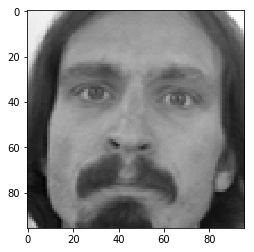

In [27]:
img = X[0].reshape(96,96)
plt.imshow(img,cmap="gray")

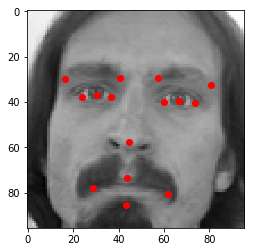

In [26]:
plot_sample(X[0],Y[0])

In [42]:
from keras.models import Sequential
from keras.layers import Dense, Activation,Flatten
from keras.optimizers import SGD
from keras.layers import Dropout

model = Sequential()
#model.add(Flatten(input_shape = (IMAGE_HEIGHT,IMAGE_WIDTH)))
model.add(Dense(128,input_dim = X.shape[1]))
model.add(Activation('relu'))
model.add(Dropout(0.1))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(30))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 128)               1179776   
_________________________________________________________________
activation_1 (Activation)    (None, 128)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)                8256      
_________________________________________________________________
activation_2 (Activation)    (None, 64)                0         
_________________________________________________________________
dense_4 (Dense)              (None, 30)                1950      
Total params: 1,189,982
Trainable params: 1,189,982
Non-trainable params: 0
_________________________________________________________________


In [43]:
sgd = SGD(lr=0.01)
model.compile(loss='mean_squared_error', optimizer=sgd)



In [45]:
model.fit(X, Y, epochs = 60)

Epoch 1/60
2140/2140 [==============================] - 1s 487us/step - loss: 0.0221
Epoch 2/60
2140/2140 [==============================] - 1s 481us/step - loss: 0.0203
Epoch 3/60
2140/2140 [==============================] - 1s 508us/step - loss: 0.0189
Epoch 4/60
2140/2140 [==============================] - 1s 616us/step - loss: 0.0183
Epoch 5/60
2140/2140 [==============================] - 1s 555us/step - loss: 0.0175
Epoch 6/60
2140/2140 [==============================] - 1s 476us/step - loss: 0.0165
Epoch 7/60
2140/2140 [==============================] - 1s 476us/step - loss: 0.0160
Epoch 8/60
2140/2140 [==============================] - 1s 484us/step - loss: 0.0150
Epoch 9/60
2140/2140 [==============================] - 1s 479us/step - loss: 0.0147
Epoch 10/60
2140/2140 [==============================] - 1s 472us/step - loss: 0.0144
Epoch 11/60
2140/2140 [==============================] - 1s 492us/step - loss: 0.0138
Epoch 12/60
2140/2140 [==============================] - 1s 484

In [48]:
y_pred = model.predict(X)

In [52]:
temp = [X[0],X[1]]

In [53]:
temp = np.stack(temp)

In [54]:
temp

array([[ 0.93333334,  0.9254902 ,  0.92941177, ...,  0.27450982,
         0.29411766,  0.35294119],
       [ 0.85882354,  0.84313726,  0.80000001, ...,  0.00392157,
         0.00392157,  0.00392157]], dtype=float32)